In [33]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

In [35]:
df = pd.read_excel(os.getcwd() + '\\result.xlsx')

In [36]:
pd.set_option('display.max_colwidth', None)
col = ['header', 'body', 'class', 'group']
df = df[col]
df.head()

header  \
0                            заявление клиента   
1                            заявление клиента   
2  не начисляются баллы в программе лояльности   
3                            заявление клиента   
4        несанкционированный запуск приложения   

                                                                                                                                                                                                                                                                                                                             body  \
0                                                                                                                                                                                                                                                                                                                не пройти платёж   
1                                                                                                                                                                                                                                                                                                                   нету кеш бяка   
2                                                                                                                                                                                                                                            добрый время сутки совершить сегодня платёж балл программа лояльность не начиститься   
3                                                                                                                                                                                                                                                                                              не работать приложение друг регион   
4  добрый день телефон samsung galaxy ос android дата приложение запускаться каждый раз включение экран разблокировка включение экран окончание звонок нажатие кнопка домой приводить закрытие немедленный открытие приложение ещё не работать стандартный автодополнение автодополнение слово написание данный обращение спасибо   

                               class                   group  
0                   платёж не прошёл  проблемы с зачислением  
1   программа лояльности подробности    программы лояльности  
2   программа лояльности подробности    программы лояльности  
3  не работает приложение неизвестно  проблемы с приложением  
4            проблемы с отображением  проблемы с приложением

In [37]:
col = ['body', 'class']
df = df[col] 
df = df[pd.notnull(df['class'])]
df['class_id'] = df['class'].factorize()[0]
category_id_df = df[['class', 'class_id']].drop_duplicates().sort_values('class_id')

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['class_id', 'class']].values)

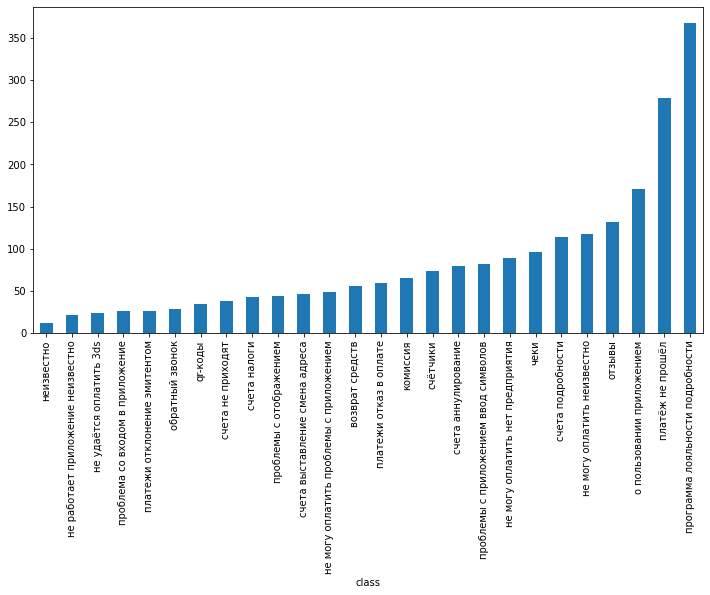

In [64]:
fig = plt.figure(figsize = (12, 6))
df.groupby('class').body.count().sort_values().plot.bar(ylim = 0)
plt.show()

In [39]:
tfidf = TfidfVectorizer(sublinear_tf = True, min_df = 5, norm = '', encoding = 'utf-8', ngram_range = (1,2))
features = tfidf.fit_transform(df.body.values.astype('U'))

In [40]:
# Логистическая регрессия:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from random import randrange
import random

In [41]:
random.seed(randrange(100))
Name = []
AverageAccuracy = []
MaxAccuracy = []
MinAccuracy = []

In [42]:
#LinearSVC:
from sklearn.svm import LinearSVC
s = 0.0
k = 100
mass = []
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(features, df['class_id'], random_state = randrange(100))
    clf = LinearSVC(penalty = 'l2', loss = 'squared_hinge', dual = True, tol = 1, C = 0.1, multi_class = 'ovr', 
                  fit_intercept = True, intercept_scaling=0.5, class_weight='balanced', verbose=0, 
                  random_state = randrange(100), max_iter = 1000)
    clf = clf.fit(X_train.toarray(), y_train)
    cur_score = clf.score(X_test.toarray(), y_test)
    s += cur_score
    mass.append(cur_score)
print('Average:',s / k)
print('Min:', min(mass))
print('Max:', max(mass))

Name.append("LinearSVC")
AverageAccuracy.append(s/k)
MinAccuracy.append(min(mass))
MaxAccuracy.append(max(mass))

Average: 0.6500183486238533
Min: 0.6073394495412844
Max: 0.6807339449541284


In [43]:
# ComplementNB
from sklearn.naive_bayes import ComplementNB
s = 0.0
k = 100
mass = []
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(features, df['class_id'], random_state = randrange(100))
    clf = ComplementNB(alpha = 50, fit_prior = False, class_prior = None, norm = False)
    clf = clf.fit(X_train.toarray(), y_train)
    cur_score = clf.score(X_test.toarray(), y_test)
    s += cur_score
    mass.append(cur_score)
print('Average:',s / k)
print('Min:', min(mass))
print('Max:', max(mass))

Name.append("ComplementNB")
AverageAccuracy.append(s/k)
MinAccuracy.append(min(mass))
MaxAccuracy.append(max(mass))

Average: 0.6414128440366972
Min: 0.6055045871559633
Max: 0.7027522935779816


In [44]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
s = 0.0
k = 100
mass = []
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(features,df['class_id'], random_state = randrange(100))
    clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 1000, min_samples_split = 10,
                                 min_samples_leaf = 0.00001, min_weight_fraction_leaf = 0, max_features = 'log2', 
                                 max_leaf_nodes = 1000, min_impurity_decrease = 0, min_impurity_split = 0, bootstrap = False,
                                 oob_score = False, n_jobs = -1, random_state = randrange(100), verbose = 100,
                                 warm_start = False, class_weight = None, ccp_alpha = 0, max_samples = 100)
    clf = clf.fit(X_train.toarray(), y_train)
    cur_score = clf.score(X_test.toarray(), y_test)
    s += cur_score
    mass.append(cur_score)
print('Average:',s / k)
print('Min:', min(mass))
print('Max:', max(mass))

Name.append("RandomForestClassifier")
AverageAccuracy.append(s/k)
MinAccuracy.append(min(mass))
MaxAccuracy.append(max(mass))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s


building tree 48 of 100building tree 49 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s


building tree 50 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
building tree 51 of 100

[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s
building tree 52 of 100building tree 53 of 100
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s
building tree 54 of 100
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s
building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54

[Parallel(n_jobs=4)]: Done  93 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  97 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100building tree 7 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[P

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s


building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.1s
building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  4

building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s


building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52

[Parallel(n_jobs=4)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  81 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  83 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  84 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  85 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  86 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  87 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  89 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  91 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  93 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Para

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100
building tree 34 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.1s

[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.1s
building tree 36 of 100
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s
building tree 37 of 100
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s
building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 10 of 100
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 ta

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100
building tree 45 of 100
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
building tree 46 of 100
building tree 47 of 100
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s
building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100building tree 51 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 9 of 100building tree 10 of 100building tree 11 of 100


building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s
building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
building tree 54 of 100
[Parallel(n_jobs=-1)]: Done  

[Parallel(n_jobs=4)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  67 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  70 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  72 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  73 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  74 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  75 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  78 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  81 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.1s
building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s


building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.1s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.1s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  3

[Parallel(n_jobs=4)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  39 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  41 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  43 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s


building tree 55 of 100
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s
building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s


building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  6

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100

[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  6

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100building tree 6 of 100

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 11 of 100building tree 12 of 100

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s
building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  5

building tree 5 of 100
building tree 6 of 100building tree 7 of 100

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 task

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 25 of 100
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100building tree 28 of 100
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:

[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  54 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
building tree 30 of 100

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
building tree 40 of 100[Parallel(n_jobs=-1)]: Done  3

building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s


building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100building tree 14 of 100[Parallel(n_jobs=-1)]: Done 

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 34 of 100
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.1s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.1s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  4

building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 14 of 100
building tree 15 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s
building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.1s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.1s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s

building tree 43 of 100
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s
building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100building tree 46 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100building tree 6 of 100

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s
building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s


building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s
building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  6

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s
building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s
building tree 59 of 100
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s
building tree 64 of 100
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    0.1s
building tree 66 of 100[Parallel(n_jobs=-1)]: Done  62

building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 12 of 100
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s


building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s
building tree 44 of 100
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.0s
building tree 45 of 100[Parallel(n_jobs=-1)]: Done  4

[Parallel(n_jobs=4)]: Done  89 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  91 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  93 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  97 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_job

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s
building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s


building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s


building tree 58 of 100
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s
building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s
building tree 62 of 100
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s
building tree 65 of 100
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    0.1s

building tree 66 of 100[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    0.1s

building tree 67 of 100[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:    0.1s

building tree 68 of 100[Parallel(n_jobs=-1)]: Done  6

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s
building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100building tree 60 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  5

[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Paralle

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100
[Parallel(n_jobs=-1)]: Done  3

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100building tree 7 of 100

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 12 of 100
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
building tree 55 of 100
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s
building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s
building tree 63 of 100

[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s
building tree 64 of 100
building tree 65 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s


C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
building tree 39 of 100
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  4

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
building tree 22 of 100

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
building tree 23 of 100building tree 24 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
building tree 25 of 100[Parallel(n_jobs=-1)]: Done  2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    0.1s

building tree 66 of 100[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    0.1s

building tree 67 of 100[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:    0.1s

building tree 68 of 100[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s

building tree 69 of 100[Parallel(n_jobs=-1)]: Done  6

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s


building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
building tree 34 of 100
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s


C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100
[Parallel(n_jobs=-1)]: Done  

building tree 9 of 100
building tree 10 of 100building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100building tree 16 of 100
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100
building tree 19 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s
building tree 62 of 100

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s
building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    0.1s

building tree 66 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
building tree 35 of 100
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  3

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1

[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  54 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s


building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  3

building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 9 of 100building tree 10 of 100
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s


building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s


building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s
building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s


building tree 58 of 100[Parallel(n_jobs=-1)]: Done  5

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.

[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  54 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.1s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.1s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  3

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 29 of 100
[Parallel(n_jobs=-1)]: Done  25

[Parallel(n_jobs=4)]: Done  91 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  93 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  97 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s

building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
[Pa

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s

building tree 44 of 100
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.0s
building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.0s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s
building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  4

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 20 of 100

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  2

building tree 1 of 100
building tree 2 of 100building tree 3 of 100building tree 4 of 100


building tree 5 of 100building tree 6 of 100

building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s
building tree 65 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
building tree 40 of 100[Parallel(n_jobs=-1)]: Done  3

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 7 of 100building tree 8 of 100

[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 ta

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    0.1s

building tree 66 of 100[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    0.1s

building tree 67 of 100[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:    0.1s

building tree 68 of 100[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s

building tree 69 of 100[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.1s

building tree 70 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s


building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.0s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s


building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  2

building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s

building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s
building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s
building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s
building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s
building tree 4

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
building tree 25 of 100[Parallel(n_jobs=-1)]: Done  2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    0.1s
building tree 66 of 100[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    0.1s


building tree 67 of 100[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:    0.1s

building tree 68 of 100[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s

building tree 69 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.0s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  4

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 13 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 18 of 100
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 12 of 100
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s
building tree 62 of 100
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s


building tree 35 of 100
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
building tree 38 of 100
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
building tree 39 of 100

[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.0s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  4

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
building tree 19 of 100
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 13 of 100
building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s
building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s
building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s


building tree 65 of 100
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    0.1s
building tree 66

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
building tree 35 of 100

[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.0s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.0s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.0s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  4

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 10 of 100
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100building tree 16 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s


building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s


building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s


building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s

building tree 65 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100
building tree 34 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
building tree 35 of 100building tree 36 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed: 

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100building tree 14 of 100
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100building tree 6 of 100

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s


building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  4

building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s


building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s
building tree 60 of 100
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
building tree 61 of 100[Parallel(n_jobs=-1)]: Done  5

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
building tree 27 of 100

[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
building tree 28 of 100
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 29 of 100[Parallel(n_jobs=-1)]: Done  2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100building tree 6 of 100building tree 7 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s
building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s


building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s
building tree 59 of 100
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

building tree 23 of 100
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
building tree 26 of 100

[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 task

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  5

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 9 of 100building tree 10 of 100building tree 11 of 100


building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100building tree 14 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 16 of 100
build

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100building tree 49 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed: 

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100building tree 10 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s


building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100building tree 14 of 100

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100
[Parallel(n_jobs=

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100building tree 14 of 100

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks    

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s


building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s


building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 

building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 10 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s

building tree 37 of 100
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s
building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.1s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.1s

building tree 41 of 100building tree 42 of 100
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
building tree 47 of 100[Parallel(n_jobs=-1)]: Done  4

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s
building tree 44 of 100[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed: 

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Para

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100
building tree 27 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
building tree 30 of 100

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100
building tree 33 of 100
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 10 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s
building tree 58 of 100

[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s
building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  5

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100
building tree 15 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
building tree 17 of 100building tree 18 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 19 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s


[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100
building tree 21 of 100
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
building tree 22 of 100
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  1

building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100building tree 11 of 100

[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 12 of 100
building tree 13 of 100building tree 14 of 100
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.1s
building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s

building tree 37 of 100
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s
building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.1s

building tree 40 of 100
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.1s
building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s

building tree 42 of 100[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s

building tree 43 of 100[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s

building tree 44 of 100building tree 45 of 100
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s


building tree 28 of 100
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 29 of 100
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
building tree 33 of 100
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100building tree 36 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s


building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100
building tree 2 of 100building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 ta

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s
building tree 48 of 100
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s
building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21

building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s


building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  5

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 13 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 14 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 15 of 100
building tree 16 of 100
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
building tree 17 of 100
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 18 of 100building tree 19 of 100
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100
[Parallel(n_job

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 5 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 task

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Para

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 9 of 100building tree 10 of 100

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100

[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 ta

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s
building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100building tree 19 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100
building tree 23 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  2

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s


building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  3

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 100building tree 7 of 100

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    0.1s

building tree 62 of 100[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s

building tree 63 of 100[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    0.1s

building tree 64 of 100[Parallel(n_jobs=-1)]: Done  6

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
building tree 34 of 100
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 100building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100building tree 15 of 100[Parallel(n_

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 44 of 100
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s
building tree 45 of 100[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s

building tree 46 of 100[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s

building tree 47 of 100[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    0.1s

building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
building tree 55 of 100
[Parallel(n_jobs=-1)]: Done  5

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 10 of 100
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
building tree 23 of 100

[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29

[Parallel(n_jobs=4)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  54 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Do

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 38 of 100
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
building tree 39 of 100
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
building tree 40 of 100
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100building tree 3 of 100


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s
building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.1s

building tree 60 of 100[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s

building tree 61 of 100[Parallel(n_jobs=-1)]: Done  5

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 15 of 100[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 16 of 100
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s

building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
building tree 19 of 100[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s


building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  2

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s

building tree 26 of 100[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 9 of 100
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 11 of 100
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 ta

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 48 of 100[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s

building tree 49 of 100[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s

building tree 50 of 100[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s

building tree 51 of 100[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.1s

building tree 52 of 100[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.1s

building tree 53 of 100[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s

building tree 54 of 100[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s

building tree 55 of 100[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.1s

building tree 56 of 100[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.1s

building tree 57 of 100[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.1s

building tree 58 of 100[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.1s

building tree 59 of 100[Parallel(n_jobs=-1)]: Done  55

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "



building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

building tree 23 of 100[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s

building tree 25 of 100building tree 26 of 100[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
building tree 27 of 100[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 28 of 100[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s

building tree 29 of 100
building tree 30 of 100
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 31 of 100[Parallel(n_jobs=-1)]: Done  2

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 15 of 100
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 16 of 100
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
building tree 17 of 100[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s

building tree 18 of 100[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s

building tree 19 of 100
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 20 of 100[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 21 of 100[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 22 of 100building tree 23 of 100[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s


building tree 24 of 100[Parallel(n_jobs=-1)]: Done  20

In [45]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
mass = []
s = 0.0
k = 10
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(features,df['class'], random_state = randrange(100))
    clf = LogisticRegression(C = 0.1, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 0,
                             max_iter = 150, multi_class = 'multinomial', n_jobs = -1, penalty = 'l2',
                             random_state = 0, solver = 'saga', tol = 0.001, verbose = 0, warm_start=False)
    clf = clf.fit(X_train.toarray(), y_train)
    cur_score = clf.score(X_test.toarray(), y_test)
    s += cur_score
    mass.append(cur_score)
print('Average:',s / k)
print('Min:', min(mass))
print('Max:', max(mass))

Name.append("LogisticRegression")
AverageAccuracy.append(s/k)
MinAccuracy.append(min(mass))
MaxAccuracy.append(max(mass))

C:\Users\konon\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\konon\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\konon\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\konon\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\konon\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

Average: 0.6943119266055044
Min: 0.6568807339449542
Max: 0.7137614678899082


In [52]:
data = {'Model_Name': Name, 'Average_Accuracy': AverageAccuracy, 'Max_Accuracy': MaxAccuracy, 'Min_Accuracy': MinAccuracy}
stats_frame = pd.DataFrame(data)
sorted_frame = stats_frame.sort_values('Average_Accuracy', ascending = False)
sorted_frame.head()

Model_Name  Average_Accuracy  Max_Accuracy  Min_Accuracy
3      LogisticRegression          0.694312      0.713761      0.656881
2  RandomForestClassifier          0.653028      0.715596      0.603670
0               LinearSVC          0.650018      0.680734      0.607339
1            ComplementNB          0.641413      0.702752      0.605505

C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


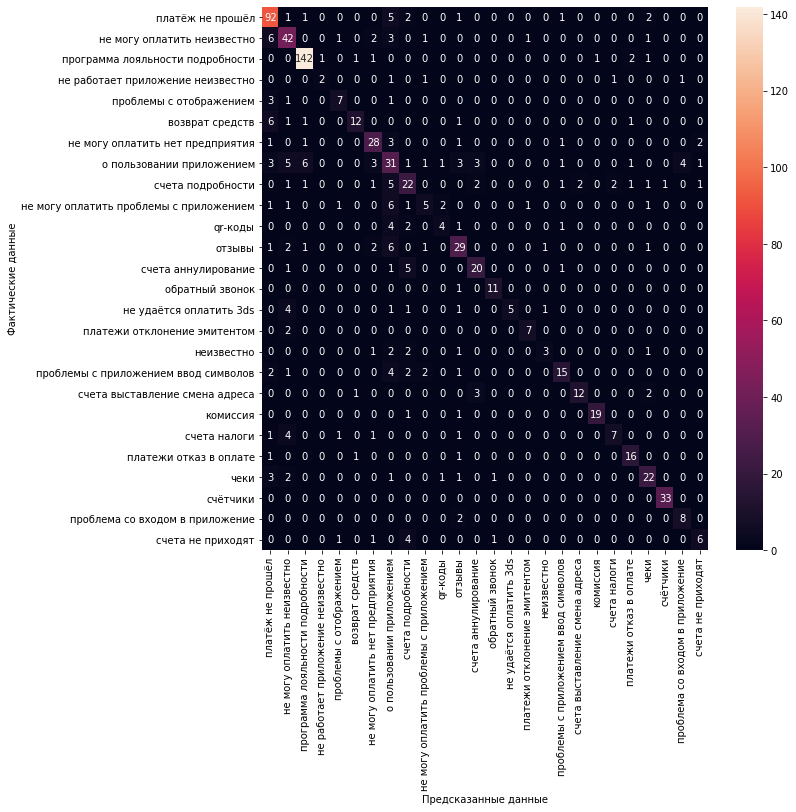

In [83]:
model = LogisticRegression(C = 0.1, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 0, max_iter=50,
                           multi_class = 'multinomial', n_jobs = -1, penalty = 'l2', random_state = 0, solver = 'saga', 
                           tol = 0.001, verbose = 0, warm_start = False)
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, df.index, 
                                                                               test_size = 0.33, random_state = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(conf_mat, annot = True, fmt = 'd', xticklabels = category_id_df['class'].values, yticklabels = category_id_df['class'].values)
plt.ylabel('Фактические данные')
plt.xlabel('Предсказанные данные')
plt.show()

In [77]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names = df['class'].unique()))

                                         precision    recall  f1-score   support

                       платёж не прошёл       0.77      0.88      0.82       105
            не могу оплатить неизвестно       0.62      0.74      0.67        57
       программа лояльности подробности       0.93      0.95      0.94       149
      не работает приложение неизвестно       0.67      0.33      0.44         6
                проблемы с отображением       0.64      0.58      0.61        12
                        возврат средств       0.80      0.55      0.65        22
       не могу оплатить нет предприятия       0.70      0.76      0.73        37
              о пользовании приложением       0.42      0.48      0.45        64
                      счета подробности       0.51      0.54      0.52        41
не могу оплатить проблемы с приложением       0.45      0.26      0.33        19
                                qr-коды       0.50      0.33      0.40        12
                           

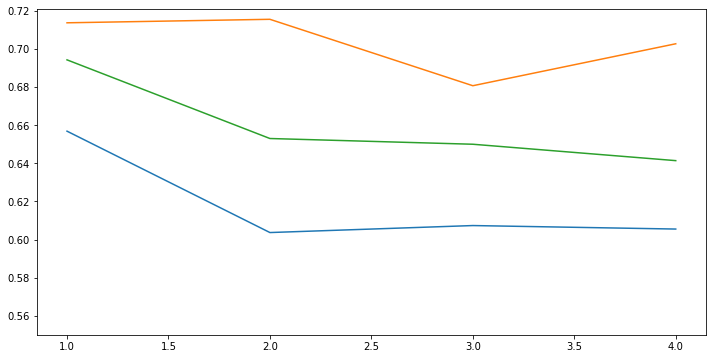

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))
plt.plot([1,2,3,4], sorted_frame['Min_Accuracy'])
plt.plot([1,2,3,4], sorted_frame['Max_Accuracy'])
plt.plot([1,2,3,4], sorted_frame['Average_Accuracy'])
plt.ylim(bottom = 0.55)
plt.show()